In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
df = pd.read_csv('/content/drive/MyDrive/Spring 2022/IDS 576/Project/Data/TripAdvisor_US_data.csv')
df.drop(['Unnamed: 0', 'code'], axis=1, inplace=True)
df = df.astype({"ReviewID": str})
df.drop_duplicates(subset=['ReviewID'], inplace=True)
df = df[df.ISO == "USA"]
data = df

In [40]:
len(data)

1468021

In [33]:
count_nan = len(data) - data.count()
count_nan

HotelName                    57
ReviewID                      0
ReviewDate                    0
ReviewStar                    0
CountReviews               3847
ReviewerProfile             111
ReviewerContribution      19830
ReviewerLocation         436260
ReviewHelpfulVotes       631768
DateOfStay                   45
ResponseDate             532619
TripType                 993933
ValueScore              1181799
ServiceScore            1096710
Sleep QualityScore      1186823
RoomsScore              1186169
LocationScore           1182857
CleanlinessScore        1182233
City_Country                  0
ISO                           0
YEAR                          0
ReviewText                    0
ResponseText             532619
dtype: int64

In [34]:
data = data.dropna(subset=['HotelName','DateOfStay'])
data = data.loc[:,['ReviewID', 'HotelName', 'ReviewStar', 'ReviewDate', 'ResponseDate', 'TripType', 'City_Country', 'YEAR', 'ReviewText', 'ResponseText']]
data['ResponseAvailable'] = data.ResponseText.isna()
data['ResponseAvailable'] = data['ResponseAvailable'].map({True: 'No', False: 'Yes'})
data['TripType'] = data['TripType'].map({'Traveled on business': 'Business', 
                                         'Traveled with family': 'Family',
                                         'Traveled with friends': 'Friends',
                                         'Traveled solo': 'Solo', 
                                         'Traveled as a couple': 'Couple'})
data['TripType'] = data['TripType'].fillna('Unknown')
data.rename(columns={'City_Country':'State', 'YEAR': 'Year'}, inplace=True)
data['ReviewStar'] = (data['ReviewStar']/10)
data['ReviewStar'] = data['ReviewStar'].astype(int)
data.drop(['ReviewText', 'ResponseText'], axis=1, inplace=True)

In [35]:
data.head()

,ReviewID,HotelName,ReviewStar,ReviewDate,ResponseDate,TripType,State,Year,ResponseAvailable
0,787496819,Home2 Suites by Hilton Shenandoah the Woodlands,1,Apr 2021,2021-04-29,Unknown,TX,2021.0,Yes
1,787378922,Home2 Suites by Hilton Shenandoah the Woodlands,5,Apr 2021,NaN,Unknown,TX,2021.0,No
2,785865562,Home2 Suites by Hilton Shenandoah the Woodlands,5,Apr 2021,2021-04-06,Business,TX,2021.0,Yes
3,784977541,Home2 Suites by Hilton Shenandoah the Woodlands,5,Mar 2021,2021-04-06,Unknown,TX,2021.0,Yes
4,782281794,Home2 Suites by Hilton Shenandoah the Woodlands,1,Feb 2021,NaN,Couple,TX,2021.0,No


In [ ]:
data.to_csv('/content/drive/MyDrive/Spring 2022/IDS 576/Project/Data/TripAdvisorData_Processed.csv', index=None)

In [ ]:
data2 = df
data2 = data2.drop(['CountReviews', 'ReviewerProfile', 'ReviewerContribution', 'ReviewerLocation', 'ReviewHelpfulVotes'], axis=1) 
data2 = data2.dropna()
data2['ValueScore'] = (data2['ValueScore']/10)
data2['RoomsScore'] = (data2['RoomsScore']/10)
data2['LocationScore'] = (data2['LocationScore']/10)
data2['CleanlinessScore'] = (data2['CleanlinessScore']/10)
data2['ServiceScore'] = (data2['ServiceScore']/10)
data2['ReviewStar'] = (data2['ReviewStar']/10)
data2['SleepQualityScore'] = (data2['Sleep QualityScore']/10)

In [52]:
len(data2)

123154

In [53]:
data2.head()

,HotelName,ReviewID,ReviewDate,ReviewStar,DateOfStay,ResponseDate,TripType,ValueScore,ServiceScore,Sleep QualityScore,RoomsScore,LocationScore,CleanlinessScore,City_Country,ISO,YEAR,ReviewText,ResponseText,SleepQualityScore
2,Home2 Suites by Hilton Shenandoah the Woodlands,785865562,Apr 2021,5.0,December 2020,2021-04-06,Traveled on business,5.0,5.0,40.0,5.0,5.0,5.0,TX,USA,2021.0,"Staff very professional, work hard to keep eve...","Dear betsyalor, I wanted to say thanks for yo...",4.0
31,Homewood Suites by Hilton Houston - Woodlands,746761496,Feb 2020,1.0,February 2020,2020-02-24,Traveled on business,1.0,1.0,10.0,1.0,1.0,1.0,TX,USA,2020.0,The entire hotel needs to renovated. It smell...,"Dear thakidsweet, Thank you for your review....",1.0
38,Best Western Plus Landmark Hotel,778664527,Dec 2020,5.0,November 2020,2020-12-09,Traveled on business,5.0,5.0,50.0,5.0,4.0,5.0,UT,USA,2020.0,It’s a great place to stay. Rooms are always s...,Thank you for participating in the TripAdvisor...,5.0
95,Best Western NSU Inn,777755666,Nov 2020,4.0,November 2020,2020-11-26,Traveled on business,4.0,4.0,50.0,4.0,5.0,4.0,OK,USA,2020.0,This is a very nice and clean facility. The st...,Dear Trek Thank you for completing the survey...,5.0
259,Baymont by Wyndham Kingwood,782740718,Feb 2021,5.0,January 2021,2021-02-13,Traveled on business,5.0,5.0,50.0,5.0,5.0,5.0,TX,USA,2021.0,A home away from home place to stay. Consideri...,Thank you for taking the time to tell us about...,5.0


In [54]:
data2 = data2[['ValueScore', 'ServiceScore', 'SleepQualityScore', 'RoomsScore', 'LocationScore', 'CleanlinessScore', 'ReviewStar']]

In [55]:
corr = data2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

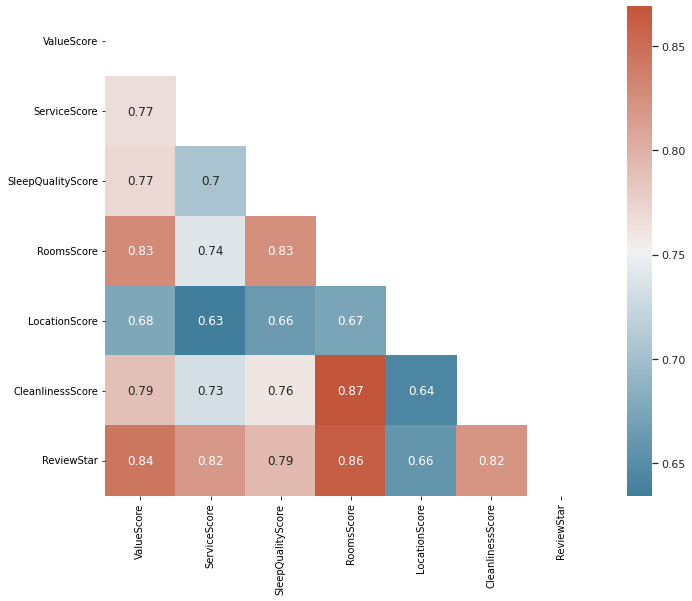

In [56]:
f, ax = plt.subplots(figsize=(11, 9))
sns.set_theme(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)